In [12]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd
from Utils.styles import *
from Grid.src.functions import contour_template

In [13]:
su2File = "supersonicWedge_JST/su2_lowerwall.csv"
ctbfmFiles = [
    "supersonicWedge_Roe/Volume_CSV/results.csv",
    "supersonicWedge_Roe2/Volume_CSV/results.csv",
    "supersonicWedge_JST/Volume_CSV/results.csv",
    ]

labels = [
    'Roe1',
    'Roe2',
    'JST',
    ]

ls = [
    '--',
    '-.',
    ':',
    ]

ls = [
    '-o',
    '-^',
    '-v',
    ]

In [14]:
su2 = pd.read_csv(su2File)

In [15]:
ctbfms = []
for ctbfmFile in ctbfmFiles:
    with open(ctbfmFile, 'r') as f:
        ni = int(f.readline().strip().split('=')[1])
        nj = int(f.readline().strip().split('=')[1])
        nk = int(f.readline().strip().split('=')[1])

    df = pd.read_csv(ctbfmFile, skiprows=3)
    ctbfm = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}
    ctbfms.append(ctbfm)

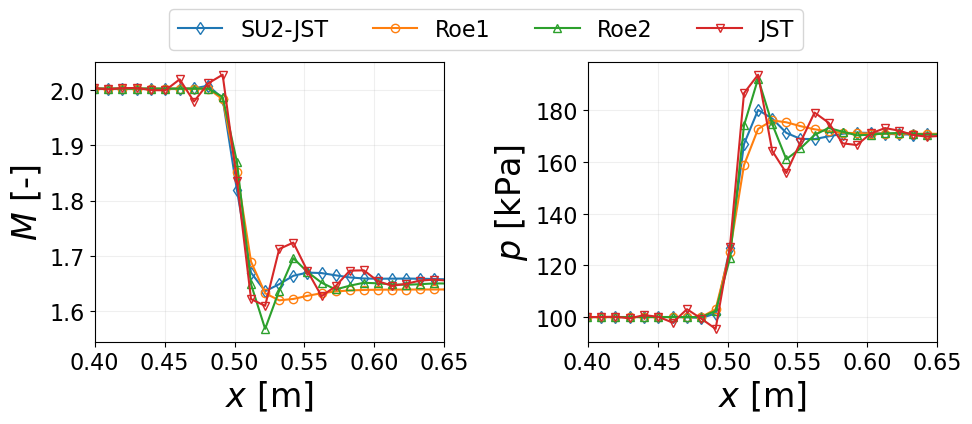

In [18]:

# Create figure and subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ========== Left subplot: Mach number ==========
ax1.plot(su2['Points_0'], su2['Mach'], '-d', mfc='none', label='SU2-JST')
for ii, ctbfm in enumerate(ctbfms):
    ax1.plot(ctbfm['x'][:, 0, 0], ctbfm['Mach'][:, 0, 0], ls[ii], mfc='none', label=labels[ii])

ax1.set_xlabel(r'$x$ [m]')
ax1.set_ylabel(r'$M$ [-]')
ax1.grid(alpha=0.2)
fig.legend(ncol=len(ctbfmFiles)+1, bbox_to_anchor=(0.5, 1.1), loc='upper center')

# ========== Right subplot: Pressure ==========
ax2.plot(su2['Points_0'], su2['Pressure'] / 1000, '-d', mfc='none', label='SU2')
for ii, ctbfm in enumerate(ctbfms):
    ax2.plot(ctbfm['x'][:, 0, 0], ctbfm['Pressure'][:, 0, 0] / 1000, ls[ii], mfc='none', label=labels[ii])

ax2.set_xlabel(r'$x$ [m]')
ax2.set_ylabel(r'$p$ [kPa]')
ax2.grid(alpha=0.2)


lims = [0.4, 0.65]
ax1.set_xlim(lims)
ax2.set_xlim(lims)

# Adjust layout
fig.tight_layout()

# Save figure
plt.savefig("SupersonicWedge_Mach_Pressure_subplots.pdf", bbox_inches='tight')
plt.show()

# plt.show()